In [15]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 52.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import mplfinance as mpf
import pandas as pd
from binance.client import Client
import os 
import plotly.graph_objects as go

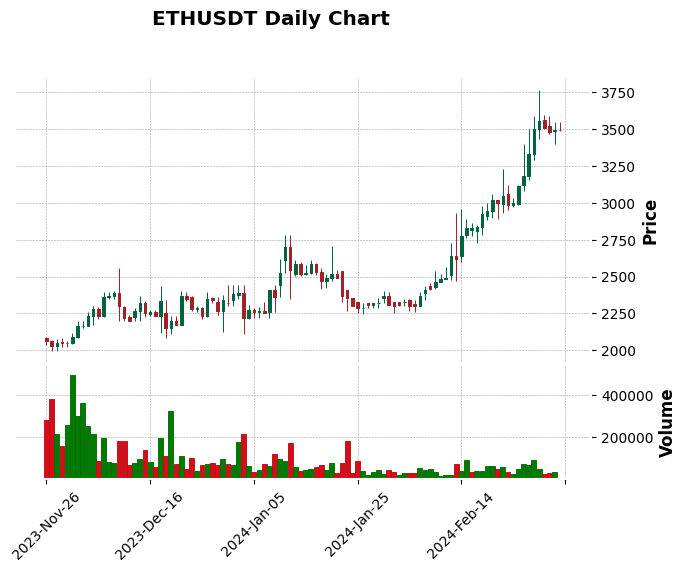

In [12]:

api_key = os.getenv("BINANCE_API_KEY")
api_secret = os.getenv("BINANCE_API_SECRET")

# Initialize the Binance client
client = Client(api_key, api_secret, testnet=True)

# Get historical candlestick data
candles = client.futures_klines(symbol='ETHUSDT', interval=Client.KLINE_INTERVAL_1DAY, limit=100)

# Create a Pandas DataFrame and set the column names
columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 
           'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
           'Taker buy quote asset volume', 'Ignore']
df = pd.DataFrame(candles, columns=columns)

# Convert timestamp to datetime and set it as index
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df.set_index('Open time', inplace=True)

# Convert all data to float type
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[column] = df[column].astype(float)

# We only need the 'Open', 'High', 'Low', 'Close', and 'Volume' columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot the candlestick chart
mpf.plot(df, type='candle', style='charles',
         title='ETHUSDT Daily Chart',
         volume=True)



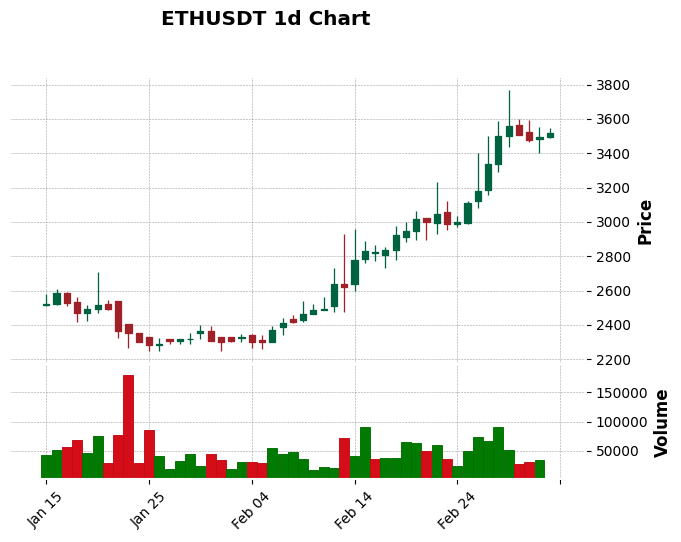

In [14]:
import os
from binance.client import Client
import pandas as pd
import mplfinance as mpf

# Load environment variables
api_key = os.getenv("BINANCE_API_KEY")
api_secret = os.getenv("BINANCE_API_SECRET")

# Initialize the Binance client
client = Client(api_key, api_secret, testnet=True)

# Get user input for symbol and interval
symbol = input("Enter the symbol (e.g., 'BTCUSDT'): ")
interval = input("Enter the interval (1m, 3m, 5m, 15m, 30m, 1h, 4h, 1d, 1w, 1M): ")
limit = int(input("Enter the limit for how many candles to retrieve (e.g., 100): "))

# Ensure interval is in the correct format for Binance client
interval_map = {
    '1m': Client.KLINE_INTERVAL_1MINUTE,
    '3m': Client.KLINE_INTERVAL_3MINUTE,
    '5m': Client.KLINE_INTERVAL_5MINUTE,
    # ... add all possible intervals here
    '1d': Client.KLINE_INTERVAL_1DAY,
    # ... and so on
}
interval = interval_map.get(interval, Client.KLINE_INTERVAL_1DAY)  # Default to 1 day if invalid

# Get historical candlestick data
candles = client.futures_klines(symbol=symbol, interval=interval, limit=limit)

# Create a Pandas DataFrame and set the column names
columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 
           'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
           'Taker buy quote asset volume', 'Ignore']
df = pd.DataFrame(candles, columns=columns)

# Convert timestamp to datetime and set it as index
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df.set_index('Open time', inplace=True)

# Convert all data to float type
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[column] = df[column].astype(float)

# We only need the 'Open', 'High', 'Low', 'Close', and 'Volume' columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot the candlestick chart
mpf.plot(df, type='candle', style='charles',
         title=f'{symbol} {interval} Chart',
         volume=True)


In [3]:
import plotly.graph_objects as go
import pandas as pd
from binance.client import Client
import os

# Load environment variables
api_key = os.getenv("BINANCE_API_KEY")
api_secret = os.getenv("BINANCE_API_SECRET")

# Initialize the Binance client
client = Client(api_key, api_secret, testnet=True)

# Get historical candlestick data
candles = client.futures_klines(symbol='ETHUSDT', interval=Client.KLINE_INTERVAL_1DAY, limit=100)

# Create a Pandas DataFrame and set the column names
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 
           'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
           'Taker buy quote asset volume', 'Ignore']
df = pd.DataFrame(candles, columns=columns)

# Convert timestamp to datetime
df['Date'] = pd.to_datetime(df['Date'], unit='ms')

# Convert all data to float type
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[column] = df[column].astype(float)

# Use Plotly to create an interactive candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# Set the layout for the chart
fig.update_layout(
    title='ETHUSDT Daily Chart',
    yaxis_title='ETHUSDT Price',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider at the bottom
)

# Show the plot
fig.show()


In [4]:
import os
from binance.client import Client
import pandas as pd
import plotly.graph_objects as go

# Load environment variables
api_key = os.getenv("BINANCE_API_KEY")
api_secret = os.getenv("BINANCE_API_SECRET")

# Initialize the Binance client
client = Client(api_key, api_secret, testnet=True)

# Get user input for symbol and interval
symbol = input("Enter the symbol (e.g., 'BTCUSDT'): ")
interval = input("Enter the interval (1m, 3m, 5m, 15m, 30m, 1h, 4h, 1d, 1w, 1M): ")
limit = int(input("Enter the limit for how many candles to retrieve (e.g., 100): "))

# Ensure interval is in the correct format for Binance client
interval_map = {
    '1m': Client.KLINE_INTERVAL_1MINUTE,
    '3m': Client.KLINE_INTERVAL_3MINUTE,
    '5m': Client.KLINE_INTERVAL_5MINUTE,
    # ... add all possible intervals here
    '1d': Client.KLINE_INTERVAL_1DAY,
    # ... and so on
}
interval = interval_map.get(interval, Client.KLINE_INTERVAL_1DAY)  # Default to 1 day if invalid

# Get historical candlestick data
candles = client.futures_klines(symbol=symbol, interval=interval, limit=limit)

# Create a Pandas DataFrame and set the column names
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 
           'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
           'Taker buy quote asset volume', 'Ignore']
df = pd.DataFrame(candles, columns=columns)

# Convert timestamp to datetime
df['Date'] = pd.to_datetime(df['Date'], unit='ms')

# Convert all data to float type
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[column] = df[column].astype(float)

# Use Plotly to create an interactive candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# Set the layout for the chart
fig.update_layout(
    title=f'{symbol} {interval} Chart',
    yaxis_title=f'{symbol} Price',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider at the bottom
)

# Show the plot
fig.show()
